# 1. Import Library

In [2]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [5]:
x_img_train.shape    #shape出來的結果 有4個維度，第一個維度50000是筆數，第二三個維度32是影像的大小，第四個維度3是指RGB三原色

(50000, 32, 32, 3)

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
x_img_test.shape

(10000, 32, 32, 3)

In [8]:
y_label_test.shape

(10000, 1)

In [10]:
type(x_img_test)

numpy.ndarray

In [9]:
len(x_img_test)

10000

In [11]:
x_img_test[0]       #測試第一張圖32*32

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ..., 
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ..., 
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ..., 
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ..., 
       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ..., 
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ..., 
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ..., 
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67,

In [15]:
x_img_test[0].shape   #加的

(32, 32, 3)

In [16]:
len(x_img_test[0])   #加的

32

In [17]:
x_img_test[0][0] #加的

array([[158, 112,  49],
       [159, 111,  47],
       [165, 116,  51],
       [166, 118,  53],
       [160, 112,  46],
       [156, 109,  41],
       [162, 115,  47],
       [159, 113,  45],
       [158, 111,  44],
       [159, 113,  41],
       [161, 116,  41],
       [160, 111,  52],
       [161, 111,  49],
       [166, 117,  41],
       [169, 117,  45],
       [170, 119,  44],
       [167, 117,  40],
       [162, 113,  38],
       [160, 111,  39],
       [160, 112,  43],
       [156, 109,  44],
       [149, 107,  45],
       [150, 107,  45],
       [148, 106,  43],
       [149, 107,  44],
       [143, 101,  39],
       [140,  98,  43],
       [141,  97,  41],
       [143,  97,  38],
       [137,  95,  36],
       [126,  91,  36],
       [116,  85,  33]], dtype=uint8)

In [18]:
x_img_test[0][0].shape    #加的

(32, 3)

In [19]:
len(x_img_test[0][0])  #加的

32

In [20]:
x_img_test[0][0][0]   #加的

array([158, 112,  49], dtype=uint8)

In [47]:
x_img_train[0][31][31]

array([123,  92,  72], dtype=uint8)

In [17]:
x_img_test[0][0][0].shape    #加的

(3,)

In [18]:
len(x_img_test[0][0][0])   #加的

3

In [21]:
x_img_test[0][0][0][0]    #加的

158

In [20]:
x_img_test[0].size    #32*32*3  #加的

3072

In [21]:
x_img_test.size    #加的

30720000

In [8]:
y_label_test.shape

(10000, 1)

In [22]:
y_label_test.size   #加的

10000

In [31]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [32]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

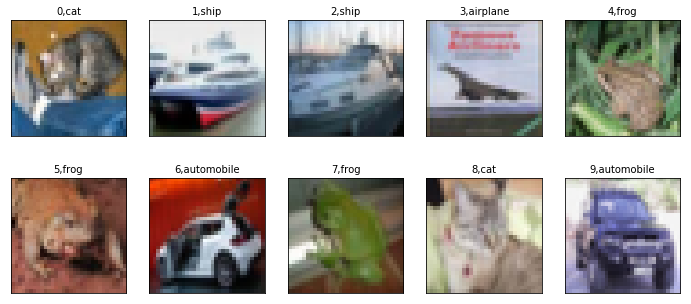

In [43]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [34]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [35]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [36]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [37]:
x_img_train_normalize[0][0][0]

array([ 0.23137255,  0.24313726,  0.24705882], dtype=float32)

# 轉換label 為OneHot Encoding

In [38]:
y_label_train.shape

(50000, 1)

In [39]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [40]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [41]:
y_label_train_OneHot.shape

(50000, 10)

In [42]:
y_label_train_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [23]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [24]:
dict_cifar_test_10_train = unpickle("C:\\Users\\Administrator\\.keras\\datasets\\cifar-10-batches-py\\data_batch_1")

In [25]:
dict_cifar_test_10_train

{b'batch_label': b'training batch 1 of 5',
 b'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8),
 b'filenames': [b'leptodactylus_pentadactylus_s_000004.png',
  b'camion_s_000148.png',
  b'tipper_truck_s_001250.png',
  b'american_elk_s_001521.png',
  b'station_wagon_s_000293.png',
  b'coupe_s_001735.png',
  b'cassowary_s_001300.png',
  b'cow_pony_s_001168.png',
  b'sea_boat_s_001584.png',
  b'tabby_s_001355.png',
  b'muntjac_s_001000.png',
  b'arabian_s_001354.png',
  b'quarter_horse_s_000672.png',
  b'passerine_s_000343.png',
  b'camion_s_001895.png',
  b'trailer_truck_s_000335.png',
  b'dumper_s_000821.png',
  b'alley_cat_s_000200.png',
  b'accentor_s_000677.png',
  b'frog_s_001671.png',
  b'capreolus_capreolus_s_000051.png',
  b'tomca

In [27]:
dict_cifar_test_10 = unpickle("C:\\Users\\Administrator\\.keras\\datasets\\cifar-10-batches-py\\test_batch")

In [28]:
dict_cifar_test_10

{b'batch_label': b'testing batch 1 of 1',
 b'data': array([[158, 159, 165, ..., 124, 129, 110],
        [235, 231, 232, ..., 178, 191, 199],
        [158, 158, 139, ...,   8,   3,   7],
        ..., 
        [ 20,  19,  15, ...,  50,  53,  47],
        [ 25,  15,  23, ...,  80,  81,  80],
        [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8),
 b'filenames': [b'domestic_cat_s_000907.png',
  b'hydrofoil_s_000078.png',
  b'sea_boat_s_001456.png',
  b'jetliner_s_001705.png',
  b'green_frog_s_001658.png',
  b'crapaud_s_002124.png',
  b'shooting_brake_s_000973.png',
  b'green_frog_s_000634.png',
  b'tabby_cat_s_001397.png',
  b'wagon_s_002806.png',
  b'plane_s_000026.png',
  b'dustcart_s_000045.png',
  b'toy_spaniel_s_001592.png',
  b'lippizan_s_000752.png',
  b'truck_s_000149.png',
  b'dredger_s_001437.png',
  b'puppy_s_001937.png',
  b'cow_pony_s_000038.png',
  b'boat_s_001450.png',
  b'rana_clamitans_s_000570.png',
  b'tennessee_walker_s_000353.png',
  b'stealth_fighter_s_000354.png'

In [29]:
type(dict_cifar_test_10)

dict

In [31]:
dict_cifar_test_10.keys()

dict_keys([b'labels', b'batch_label', b'filenames', b'data'])

In [32]:
len(dict_cifar_test_10[b'data'])

10000

In [33]:
len(dict_cifar_test_10[b'data'][0])

3072

In [34]:
set(dict_cifar_test_10[b'labels'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}